In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pontos = pd.read_csv("pontos.xlsx.csv", sep=';')
premios = pd.read_csv("premios.csv", sep=';')
titulos = pd.read_csv("titulos.csv", sep=';')
participacao_jogadores = pd.read_csv("participacao_jogadores.csv", sep=';')
participacao = pd.read_csv("participacoes.csv", sep=';')

###### O intuito desta análise é apenas conhecer um pouco do cenário brasileiro de League of Legends, se tratando de números de jogadores e equipes. Todos os dados eu extrai da web, e organizei em alguns csvs, sem muito critério, a ideia é analisar e visualizar as informações por aqui.

#### Particiçação 
Vamos conhecer quais as equipes mais tradicionais do cenário de Esports do Brasil, na modalidade do League of Legends.


Visualizando o DataFrame referente as participações.

In [3]:
participacao

,Equipe,Participações,Edições das quais participou
0,CNB e-Sports Club,14,"2012,2013,2014(1ª e 2ª),2015(1ª e 2ª),2016(1ª ..."
1,Vivo Keyd,14,"2013(como Keyd Team),2014(1ª e 2ª),2015(1ª , 2..."
2,KaBuM! e-Sports,14,"2014(1ª e 2ª),2015(1ª,2ª e Pós-Temporada como ..."
3,INTZ e-Sports,14,"2014(2ª),2015(1ª,2ª e Pós-Temporada),2016(1ª e..."
4,paiN Gaming,14,"2012,2013,2014(1ª e 2ª),2015(1ª e 2ª), 2016(1ª..."
5,RED Canids,8,"2015(2ª e Pós-Temporada, como INTZ Red),2016(1..."
6,ProGaming Esports,6,"2017(2ª),2018(1ª e 2ª),2019(1ª),2020(1ª e 2ª c..."
7,Flamengo eSports,5,"2018(2ª), 2019(1ª e 2ª)2020(1ª e 2ª)"
8,Upercut e-sports,4,2018(2ª)2019(1ª e 2ª)2020(1ª)
9,Operation Kino,4,"2015(1ª como JAYOB),2016(1ª e 2ª),2017(1ª)"


####  O CBLOL teve sua primeira edição em 2012, então primeira análise que eu queria era saber quais foram as equipes que disputaram a primeira edição do campeonato.
#### Para isso, utilizo do recurso startswith para filtrar, pelo index, quais são as equipes.

In [4]:
participacao['Edições das quais participou'] = participacao['Edições das quais participou'].str.startswith('2012', na=False)
participacao.loc[participacao['Edições das quais participou'] == True]

,Equipe,Participações,Edições das quais participou
0,CNB e-Sports Club,14,True
4,paiN Gaming,14,True
17,RMA,2,True
26,vTi Ignis,1,True
27,vTi Nox,1,True
28,Influxo,1,True
29,Insight,1,True
30,Verdict,1,True


#### Sendo assim, sabemos que as equipes que disputaram a primeira edição do CBLOL foram: CNB e-Sports Club, paiN Gaming, RMA, vTi Ignis,vTi Nox, Influxo, Insight, Verdict.
#### Em 2021 o CBLOL adota o modelo de franquia, nesta nova modalidade, as equipes são fixas, e não existem mais rebaixamento. O que podemos observar é que, das 09 equipes que participaram da primeira edição, apenas a Pain Gaming se encontra hoje ainda ativa no campeonato.
<img src="CBLOL2021.png" >



### ------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Agora, vamos saber quais equipes, em todo histórico, somaram mais pontos, menos pontos, e chegaram em mais finais.

In [5]:
pontos

,Equipe,Pontos Ganhos,Vitórias,Empates,Derrotas,Finais Participadas
0,vTi Nox,6,2,0,1,1
1,vTi Ignis,9,3,0,0,1
2,Vivo Keyd,149,44,17,20,5
3,TShow,0,0,0,7,0
4,Team United,5,1,2,7,0
5,Team oNe eSports,25,8,1,9,1
6,Team Genesis,0,0,0,1,0
7,Team Awp,7,1,4,6,0
8,RMA e-Sports,9,3,0,2,0
9,Remo Brave e-Sports,3,0,3,5,0


In [6]:
sorted_pontos = pontos.sort_values(by=['Pontos Ganhos'],ignore_index=True,na_position='first')
sorted_pontos = sorted_pontos.tail()

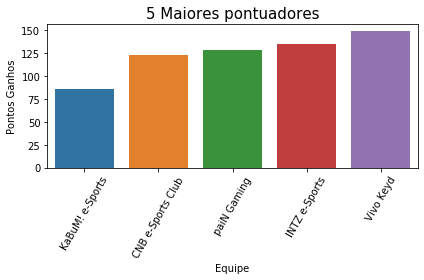

In [7]:
#criando uma figure, axes
fig, ax = plt.subplots()
#Adicionando um título
ax.set_title("5 Maiores pontuadores", fontdict={'fontsize':15})
#Colocando na inclinação os nomes das equipes
plt.xticks(rotation = 60)
#criando o gráfico de barras 
sns.barplot(x=sorted_pontos['Equipe'], y=sorted_pontos['Pontos Ganhos'], ax=ax, data=sorted_pontos)
#otimizar espaço da figure
fig.tight_layout();

#### Acaba que essa análise é um pouco inviesada pelo detalhe que, consequentemente times que estão a mais tempo na competição, terão mais pontos. Porém o fato curioso é que, equipes como INTZ e KaBum, mesmo sendo introduzidas ao CBLOL em 2014, figuram o top 5. 

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
titulos

,Equipe,Títulos,Vices,Edições em que foi campeão,Edições em que foi vice,Ref
0,INTZ e-Sports,5,2,"2015 (1ª), 2016 (1ª e 2ª), 2019 (1ª), 2020 (2ª)","2015 (2ª), 2019 (2ª)",[101]-
1,KaBuM!,4,0,"2014 (2ª), 2018 (1ª e 2ª), 2020 (1ª)",Nenhuma,NaN
2,paiN Gaming,2,3,"2013 , 2015 ( 2ª)","2014 (1°), 2017 (2ª), 2020 (2ª)",[102]
3,Vivo Keyd,1,4,2014 (1ª),"2015 (1ª), 2016 (1ª), 2017 (1ª), 2018 (1ª)",[103]
4,Flamengo eSports,1,3,2019 (2ª),"2018 (2ª), 2019 (1ª), 2020 (1ª)",NaN
5,vTi Ignis,1,0,2012,Nenhuma,NaN
6,RED Canids,1,0,2017 (1ª),Nenhuma,[104]
7,Team oNe eSports,1,0,2017 (2ª),Nenhuma,NaN
8,CNB e-Sports Club,0,3,Nenhuma,"2013, 2014(2ª), 2016 (2ª)",NaN
9,vTi Nox,0,1,Nenhuma,2012,NaN


In [9]:
titulos = titulos[['Equipe', 'Títulos', 'Vices']]
titulos

,Equipe,Títulos,Vices
0,INTZ e-Sports,5,2
1,KaBuM!,4,0
2,paiN Gaming,2,3
3,Vivo Keyd,1,4
4,Flamengo eSports,1,3
5,vTi Ignis,1,0
6,RED Canids,1,0
7,Team oNe eSports,1,0
8,CNB e-Sports Club,0,3
9,vTi Nox,0,1


#### Algumas análises que conseguimos fazer, apenas observando os títulos das equipes, é primeiramente o quão a INTZ é uma equipe forte em finais, sendo a que mais chegou em finais em todo CBLOL, mesmo iniciando sua jornada em 2014, dois anos após o inicio da competição.
#### Outra observação interessante é que, o Flamengo, apesar de possuir 3 vices, é uma organização que chegou a competição no segundo semestre de 2018, ou seja, participou ate então de 5 edições do CBLOL (No CBLOL são duas edições por ano), e ainda assim, sendo uma organização extremamente jovem, chegou a final em 4 das 5 ocasiões.
#### Ponto a se destacar é a KaBum, que nunca perdeu uma final que disputou, sendo 4 finais e 4 vitórias. 
#### E apesar de termos o Flamengo na competição, a brincadeira do cheirinho fica com a CNB, que apesar de estar na competição desde 2012, sendo sua útlima participação no segundo semestre de 2019.